## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 5: Data Visualization 
#### Excercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import numpy as np
import seaborn as sns
#from ipywidgets import interact, widgets

# Excercise 1
In this exercise, we will be using Universities_imputed_reduced.csv. Draw the following described visualizations.

    a.	Use boxplots to compare the student to faculty ratio (stud./fac. ratio) for the two population public and private universities.
    b.	Use a histogram to compare the student to faculty ratio (stud./fac. ratio) for the two population public and private universities.
    c.	use subplots to put the results of a and b on top of one another to create a visual that compares the two populations even better. 


In [2]:
uni_df = pd.read_csv('Universities_imputed_reduced.csv')
uni_df.head()

,College Name,State,Public/Private,num_appli_rec,num_appl_accepted,num_new_stud_enrolled,in-state tuition,out-of-state tuition,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,Private,193,146,55,7560,7560,76,11.9,15
1,University of Alaska at Fairbanks,AK,Public,1852,1427,928,1742,5226,67,10.0,60
2,University of Alaska Southeast,AK,Public,146,117,89,1742,5226,39,9.5,39
3,University of Alaska at Anchorage,AK,Public,2065,1598,1162,1742,5226,48,13.7,60
4,Alabama Agri. & Mech. Univ.,AL,Public,2817,1920,984,1700,3400,53,14.3,40


a. 

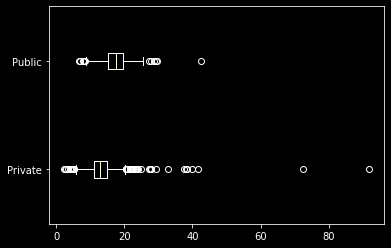

In [3]:
uni_types = uni_df.loc[:,'Public/Private'].unique()
uni_sr = pd.Series("", index = uni_types)
for t in uni_types:
    uni_sr[t] = uni_df.loc[uni_df['Public/Private']== t, 'stud./fac. ratio']
plt.boxplot(uni_sr, vert = False)
plt.yticks([1,2], uni_types)
plt.show()


b. 

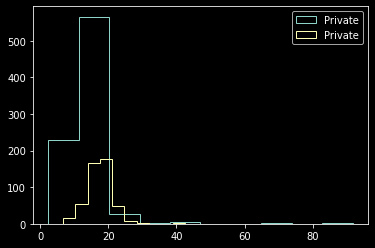

In [4]:
uni_types = uni_df.loc[:,'Public/Private'].unique()
for t in uni_types:
    plt.hist(uni_df.loc[uni_df['Public/Private']== t, 'stud./fac. ratio'], label = uni_types, histtype = 'step')
plt.legend()
plt.show()

c. 

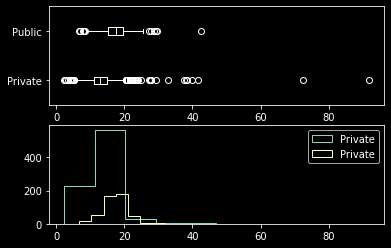

In [5]:
#subplot to combine
uni_types = uni_df.loc[:,'Public/Private'].unique()
uni_sr = pd.Series('', index = uni_types)
for t in uni_types:
    uni_sr[t] = uni_df.loc[uni_df['Public/Private'] == t, 'stud./fac. ratio']
plt.subplot(2,1,1)
plt.boxplot(uni_sr, vert = False)
plt.yticks([1,2],uni_types)

uni_types = uni_df.loc[:,'Public/Private'].unique()
plt.subplot(2,1,2)
for t in uni_types:
    plt.hist(uni_df.loc[uni_df['Public/Private'] == t, 'stud./fac. ratio'], label = uni_types, histtype = 'step')
plt.legend()
plt.show()

# Excercise 2

In this exercise, we will continue using Universities_imputed_reduced.csv. Draw the following described visualizations.

    a.	Use a bar chart to compare the private/public ratio of all the states in the dataset. In this example, the populations we are comparing are the states. 
    b.	Improve the visualizations by sorting the states on the visuals based on the total number of universities they have.
    c.	Create a stacked bar chart that shows the compare the percentages of public and private schools across different states. 

a.

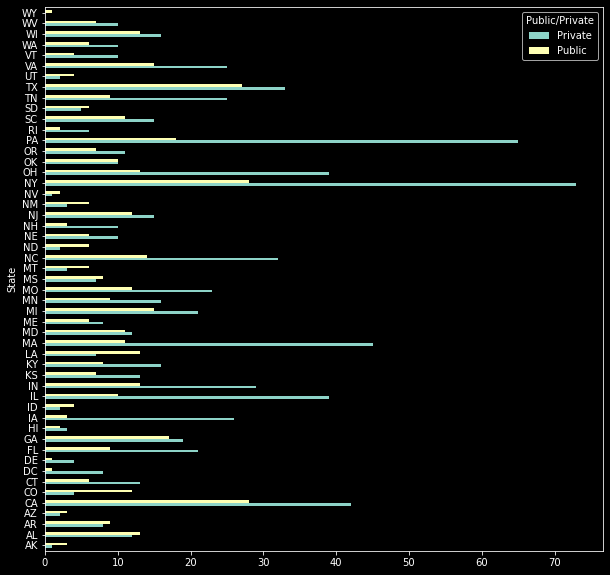

In [6]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
uni_df.groupby(['State','Public/Private']).size().unstack().plot.barh(ax = ax)
plt.show()


b.

<AxesSubplot:ylabel='State'>

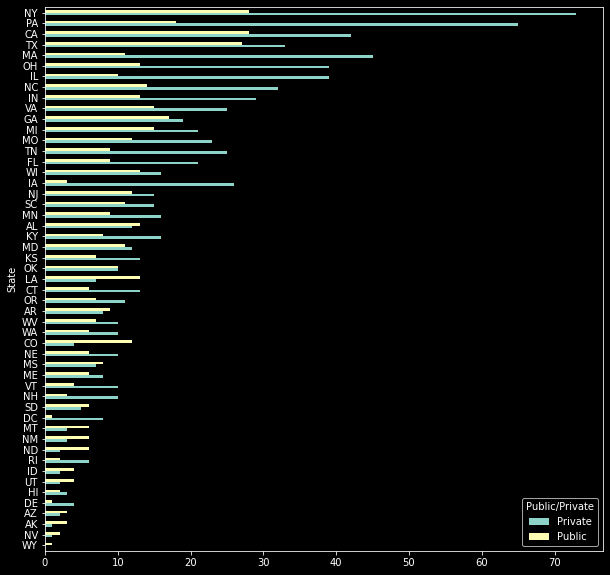

In [7]:
sort_order = uni_df.groupby(['State']).size().sort_values(ascending = True).index.to_list()

fix, ax = plt.subplots(1,1, figsize = (10,10))

uni_df.groupby(['State','Public/Private']).size().unstack().reindex(sort_order).plot.barh(ax = ax)


c.

<AxesSubplot:ylabel='State'>

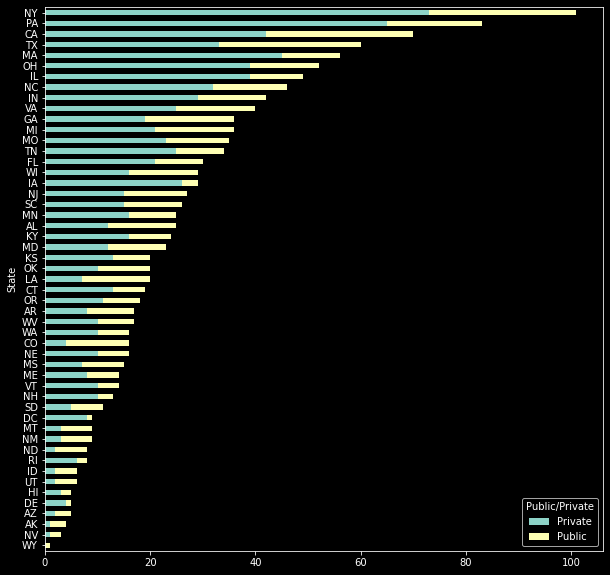

In [8]:
#same as b but with stacked
sort_order = uni_df.groupby(['State']).size().sort_values(ascending = True).index.to_list()

fix, ax = plt.subplots(1,1, figsize = (10,10))

uni_df.groupby(['State','Public/Private']).size().unstack().reindex(sort_order).plot.barh(ax = ax, stacked = True)

# Excercise 3

For this example, we will be using WH Report_preprocessed.csv. Draw the following described visualizations.

    a.	Create a visual that compares the relationship between all the happiness indices.
    b.	Use the visual you created in a) to report the happiness indices with strong relationships, and describe those relationships.
    c.	Confirm the relationship you found and described by calculating their correlation coefficients and adding these new pieces of information to your description to improve them. 


In [9]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
report_df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


a.

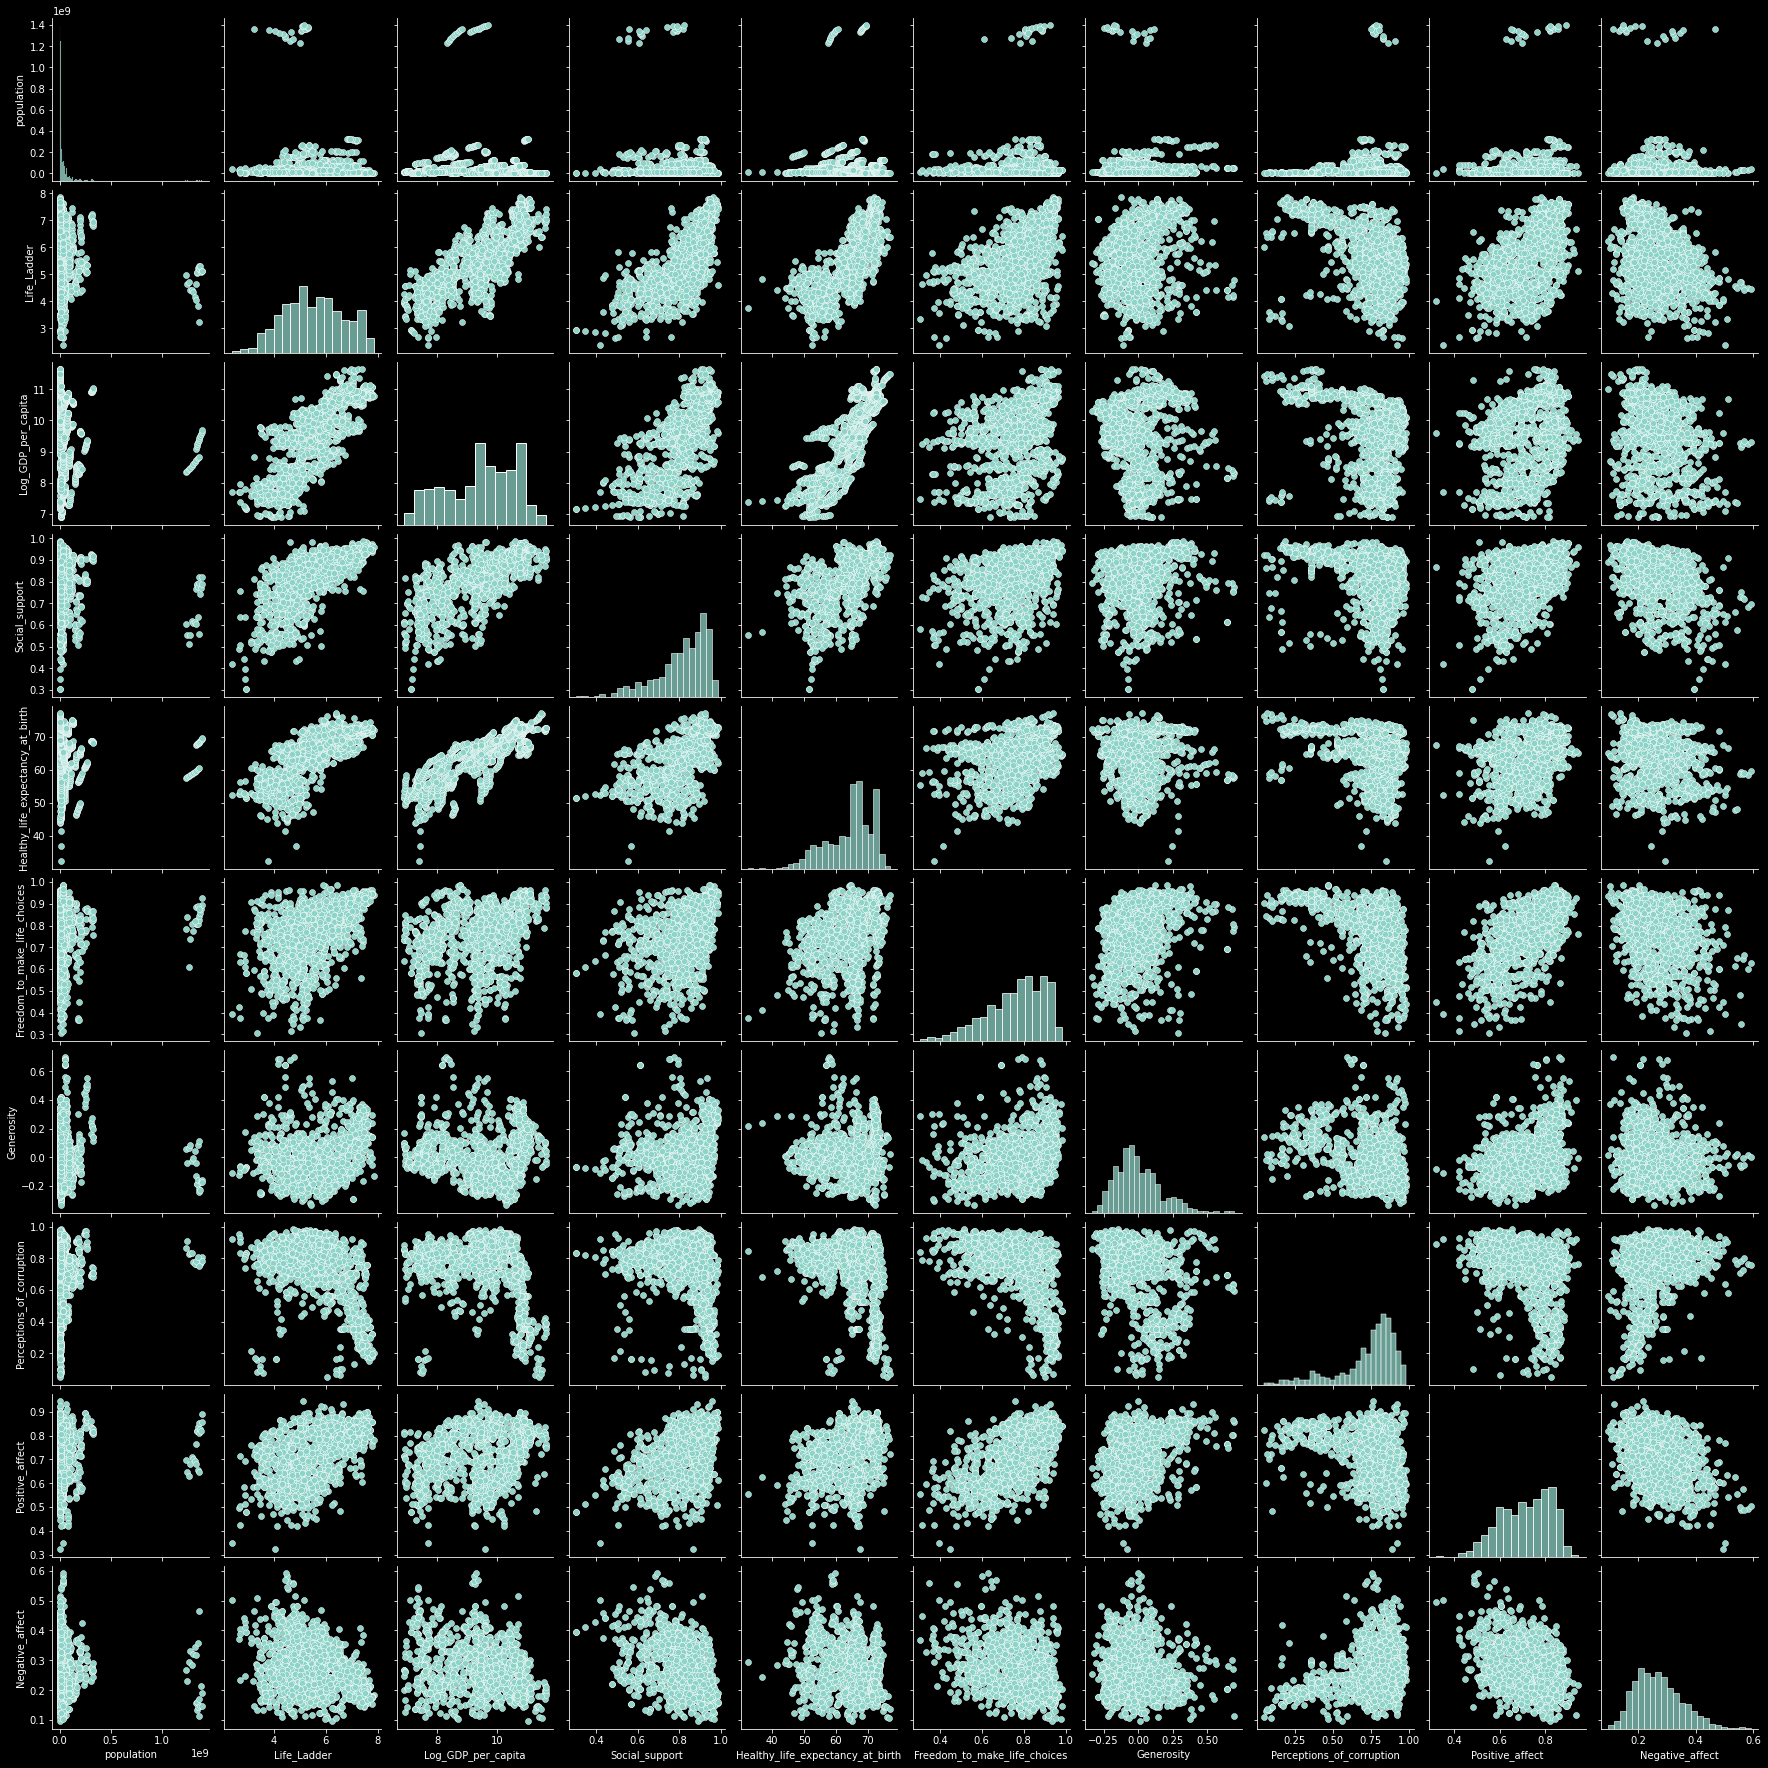

In [10]:
sns.pairplot(report_df.loc[:,'population':])
plt.show()

b. 

c.

In [11]:
report_df.loc[:,['Log_GDP_per_capita','Healthy_life_expectancy_at_birth']].corr()

,Log_GDP_per_capita,Healthy_life_expectancy_at_birth
Log_GDP_per_capita,1.000000,0.857981
Healthy_life_expectancy_at_birth,0.857981,1.000000


# Excercise 4

For this exercise, we will continue using WH Report_preprocessed.csv. Draw the following described visualizations.

    a.	Draw a visual that examine the relationship between the two attributes Continent and Generosity. 
    b.	Based on the visual, is there a relationship between the two attributes? Explain why.

a.

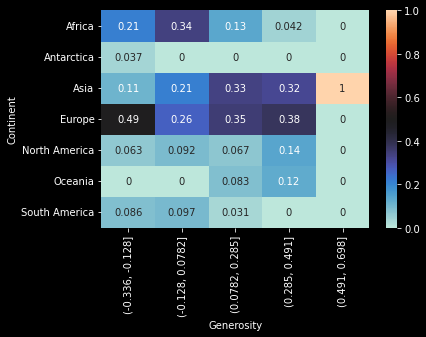

In [12]:
generosity_discretized = pd.cut(report_df.Generosity, bins = 5)
contingency_tbl = pd.crosstab(report_df.Continent, generosity_discretized)
probablity_tbl = contingency_tbl / contingency_tbl.sum()
sns.heatmap(probablity_tbl, annot = True, center = .5)
plt.show()

b.

# Excercise 5

For this exercise, we will be using whickham.csv. Draw the following described visualizations.

    a.	What is the numerical attribute in this dataset? Draw two different plots that summarize the population of data objects for the numerical attribute.
    b.	What are the categorical attributes in this dataset? Draw a plot per attribute that summarizes the population of the data object for each attribute. 
    c.	 Draw a visual that examine the relationship between outcome and smoker. Do you notice anything surprising about this visualization?
    d.	To demystify the surprising relationship you observed on c) run the following code, and study the visual it creates.

``
person_df = pd.read_csv('whickham.csv')
person_df['age_discretized'] = pd.cut(person_df.age, bins = 4, labels=False)
person_df.groupby(['age_discretized','smoker']).outcome.value_counts().unstack().unstack().plot.bar(stacked=True)
plt.show()
``

    e.	Using the visual that was created under d) explain the surprising observation under c).
    f.	How many dimensions the visual that was created under d) has? How did we manage to add dimensions to the bar chart?


In [13]:
person_df = pd.read_csv('whickham.csv')
person_df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


a.

I used code from before and compared the age differences between the two categories of those who were dead and alive.


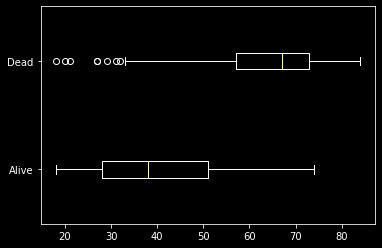

In [14]:
person_types = person_df.loc[:,'outcome'].unique()
person_sr = pd.Series('',index = person_types)
for t in person_types:
    person_sr[t] = person_df.loc[person_df['outcome'] == t, 'age']
plt.boxplot(person_sr, vert = False)
plt.yticks([1,2], person_types)
plt.show()


b.

I created bar plots of the two categorical variables of smokers and the outcome

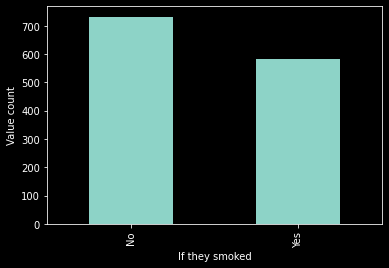

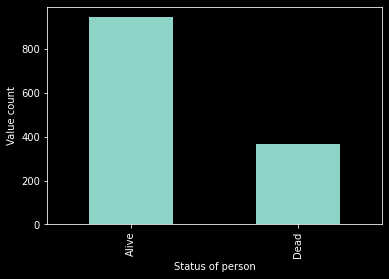

In [15]:
person_df['smoker'].value_counts().plot.bar()
plt.xlabel('If they smoked')
plt.ylabel('Value count')
plt.show()

person_df['outcome'].value_counts().plot.bar()
plt.xlabel('Status of person')
plt.ylabel('Value count')
plt.show()



c. 

Created a table which shows the number of those who are alive or dead for each of the smoking responses

In [16]:
contingency_tbl = pd.crosstab(person_df.smoker, person_df.outcome)
contingency_tbl

outcome,Alive,Dead
smoker,,
No,502,230
Yes,443,139


d. 

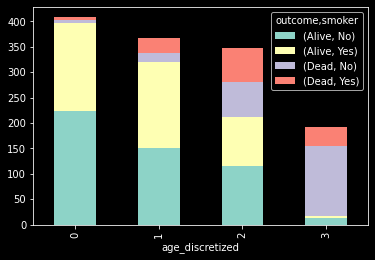

In [17]:
person_df = pd.read_csv('whickham.csv')
person_df['age_discretized'] = pd.cut(person_df.age, bins = 4, labels=False)
person_df.groupby(['age_discretized','smoker']).outcome.value_counts().unstack().unstack().plot.bar(stacked=True)
plt.show()

e.

The surprising thing about c is that it shows that there are more dead who did not smoke than those who did, but at the same time there are more people alive who didn't smoke than those who did.

f.

The dimensions were added into this chart through cutting up the age category, and then additionally dividing the data by grouping it by the age_discritized and the smoker categories.

# Excercise 6

For this exercise, we will be using WH Report_preprocessed.csv. 

    a.	Use this dataset to create a 5-dimensional scatterplot to show the interactions between the following 5 attributes: year, Healthy_life_expectancy_at_birth, Social_support, Life_Ladder, population. Use the control bar for the “year”, marker size for population, marker color for Social_support, x-axis for Healthy_life_expectancy_at_birth, and y-axis for Life_Ladder.
    b.	Interact with and study the visual you created under a) and report your observations. 



a.

I did this from the chapter notes, and tried to include each step as a seperate cell to run

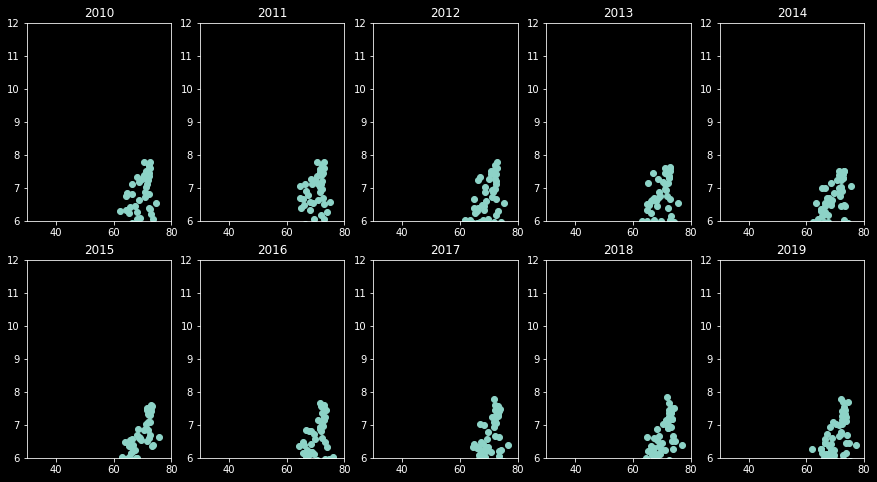

<Figure size 432x288 with 0 Axes>

In [30]:
from ipywidgets import interact, widgets
report_df = pd.read_csv('WH Report_preprocessed.csv')
plt.figure(figsize = (15,8))
year_num = report_df.year.unique()
for i, yr in enumerate(year_num):
    BM = report_df.year == yr
    X = report_df[BM].Healthy_life_expectancy_at_birth
    Y = report_df[BM].Life_Ladder
    plt.subplot(2,5,i+1)
    plt.scatter(X,Y)
    plt.title(yr)
    plt.xlim([30,80])
    plt.ylim([6,12])
plt.show()
plt.tight_layout()    

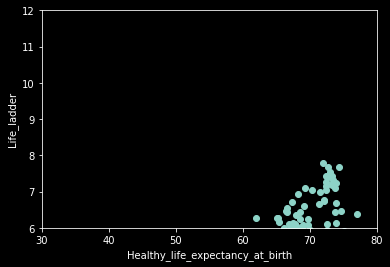

In [33]:
def plotyear(year):
    BM = report_df.year == yr
    X = report_df[BM].Healthy_life_expectancy_at_birth
    Y = report_df[BM].Life_Ladder
    plt.scatter(X,Y)
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Life_ladder')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.show()

I don't really know why the output below is not actually interactive,

In [40]:
interact(plotyear, year = widgets.IntSlider(min=2010,max=2019, step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

This step is where I ran into trouble and I believe it was due to me trying to find a way to assign colors to the social data. I wanted to create bins so I used cut on the data, but I just didn't understand how this could be then assigned colors in the code later on

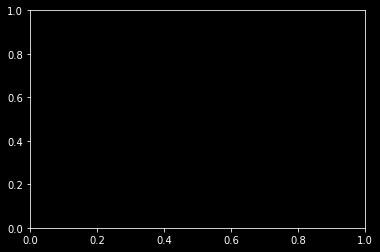

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

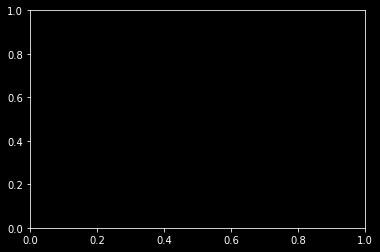

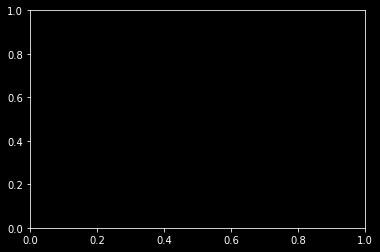

In [71]:
social_poss = report_df.Social_support.unique()
social_cut = pd.cut(x= social_poss, bins = 5)

def plotyear(year):
    for social in social_poss:
        BM1 = (report_df.year == year)
        BM2 = (report_df.Social_support == social)
        BM = BM1 & BM2
        X = report_df[BM].Healthy_life_expectancy_at_birth
        Y = report_df[BM].Life_Ladder
        plt.scatter(X,Y, c = social_poss, marker = 'o', linewidths = .5, edgecolors = 'w', label = social)
        plt.xlabel('Healthy_life_expectancy_at_birth')
        plt.ylabel('Life_ladder')
        plt.xlim([30,80])
        plt.ylim([6,12])
        plt.legend()
        plt.show()
interact(plotyear, year = widgets.IntSlider(min=2010,max=2019, step=1,value=2010))
        


b. 

To me it seems like there is a high correlation between:
1.) Healthy life expec. at birth and life ladder
2.) social support and life ladder
3.) social support and healthy life expec. at nirth


# Excercise 7

For this exercise, we will continue using WH Report_preprocessed.csv. 

    a.	Create a visual that shows the trend of change for the attribute Generosity for all the countries in the dataset. To avoid making the visual overwhelming use the color grey for the line plots of all the countries, and don’t use a legend.
    b.	Add three more line plots to the previous visual using the color blue and a thicker line (linewidth=1.8) for the three countries, United States, China, and India. Work out the visual so it only shows you the legend of these three countries. The following screenshot shows the visual that is being described.



Figure 5. 23. Line plot comparing Generosity across all countries in 2010 and 2019 with emphasis on the United States, India, and China


    c.	Report your observations from the visual. Make sure to employ all of the line plots (grey and blue ones) in your observations 

In [56]:
report_df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


a.

for question a I have produced a graph though I have had trouble trying to fix this error and have gotten stuck

IndexError: list index out of range

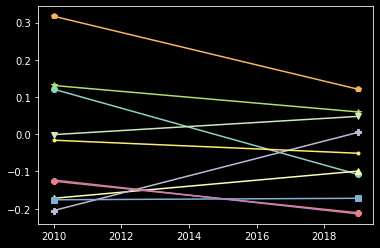

In [73]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
country_df = report_df.Name.unique()
byCountryGenerosity = report_df.groupby(['Name','year']).Generosity.mean()
Markers_options = ['o','^','P','8','s','p','*','4','v','.']
for i,c in enumerate(country_df):
    plt.plot( [2010,2019], byCountryGenerosity.loc[c,[2010,2019]], label = c, marker = Markers_options[i])
plt.xticks([2010,2019])
plt.legend(bbox_to_anchor = (1.05,1))
plt.title('Generosity per country in 2010-2019')
plt.label('Generosity')
plt.show()

b.

c.

It seems that there is a big discrepancy between the countries and their mean generosity score